In [42]:
import pandas as pd
import soundscapy as sspy
import warnings
warnings.filterwarnings('ignore')

# Read in the data
a_df = pd.read_excel('2023-03-28_18-03_circumplex_data.xlsx', sheet_name='A')
av_df = pd.read_excel('2023-03-28_18-03_circumplex_data.xlsx', sheet_name='AV')
v_df = pd.read_excel('2023-03-28_18-03_circumplex_data.xlsx', sheet_name='V')

paq_aliases = {
    'Pleasant': 'PAQ1',
    'Vibrant': 'PAQ2',
    'Eventful': 'PAQ3',
    'Chaotic': 'PAQ4',
    'Annoying': 'PAQ5',
    'Monotonous': 'PAQ6',
    'Uneventful': 'PAQ7',
    'Calm': 'PAQ8',
}

In [46]:
a_df['Experiment'] = "Audio"
av_df['Experiment'] = "Audio-Visual"
v_df['Experiment'] = "Visual"

df = pd.concat([a_df, av_df, v_df])
df = df.rename(columns=paq_aliases)
df, excl_df = df.sspy.validate_dataset(val_range=(-50, 50))


In [38]:
df

,Participant,trial,response_id,started,finished,PAQ1,PAQ4,PAQ2,PAQ7,PAQ8,...,PAQ3,PAQ6,scene_id,response,SessionID,ISOPleasant,ISOEventful,Experiment,finshed,`
0,P1,0,30.0,NaN,NaN,35,40,50,-50,-50,...,50,-50,0QUE,NaN,MiradorSanNicolas1,0.335807,0.970711,Audio,NaN,NaN
1,P1,1,31.0,12/03/2023 12:44,12/03/2023 12:47,-50,22,-50,41,-50,...,3,39,1V,NaN,BidderSt2,-0.885772,-0.207193,Audio,NaN,NaN
2,P1,2,32.0,NaN,NaN,27,-34,15,-25,12,...,4,30,19V,NaN,OlympicSq3,0.409741,-0.058543,Audio,NaN,NaN
3,P1,3,33.0,NaN,NaN,-50,-9,-50,40,-50,...,-44,42,24V,NaN,BlundellSt1,-0.803762,-0.497315,Audio,NaN,NaN
4,P1,4,34.0,NaN,NaN,14,-38,-26,-8,-16,...,-12,13,21V,NaN,KingsfordRow1,-0.033223,-0.195233,Audio,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,P20,21,48.0,21/03/2023 13:13:35,21/03/2023 13:14:29,40,-49,19,44,42,...,-43,-28,19V,NaN,OlympicSq3,0.756274,-0.489239,Visual,NaN,NaN
169,P20,22,49.0,21/03/2023 13:15:00,21/03/2023 13:15:52,7,-39,-15,37,40,...,-41,35,17V,NaN,IvesRd1,0.229914,-0.700919,Visual,NaN,NaN
170,P20,23,50.0,21/03/2023 13:16:32,21/03/2023 13:17:18,6,11,20,-14,11,...,18,-10,6V,NaN,PingshanSt1,0.145858,0.220416,Visual,NaN,NaN
171,P20,24,51.0,21/03/2023 13:17:56,21/03/2023 13:18:59,44,-37,4,45,50,...,-45,-24,3V,NaN,NewRiverWalk1,0.709619,-0.545599,Visual,NaN,NaN


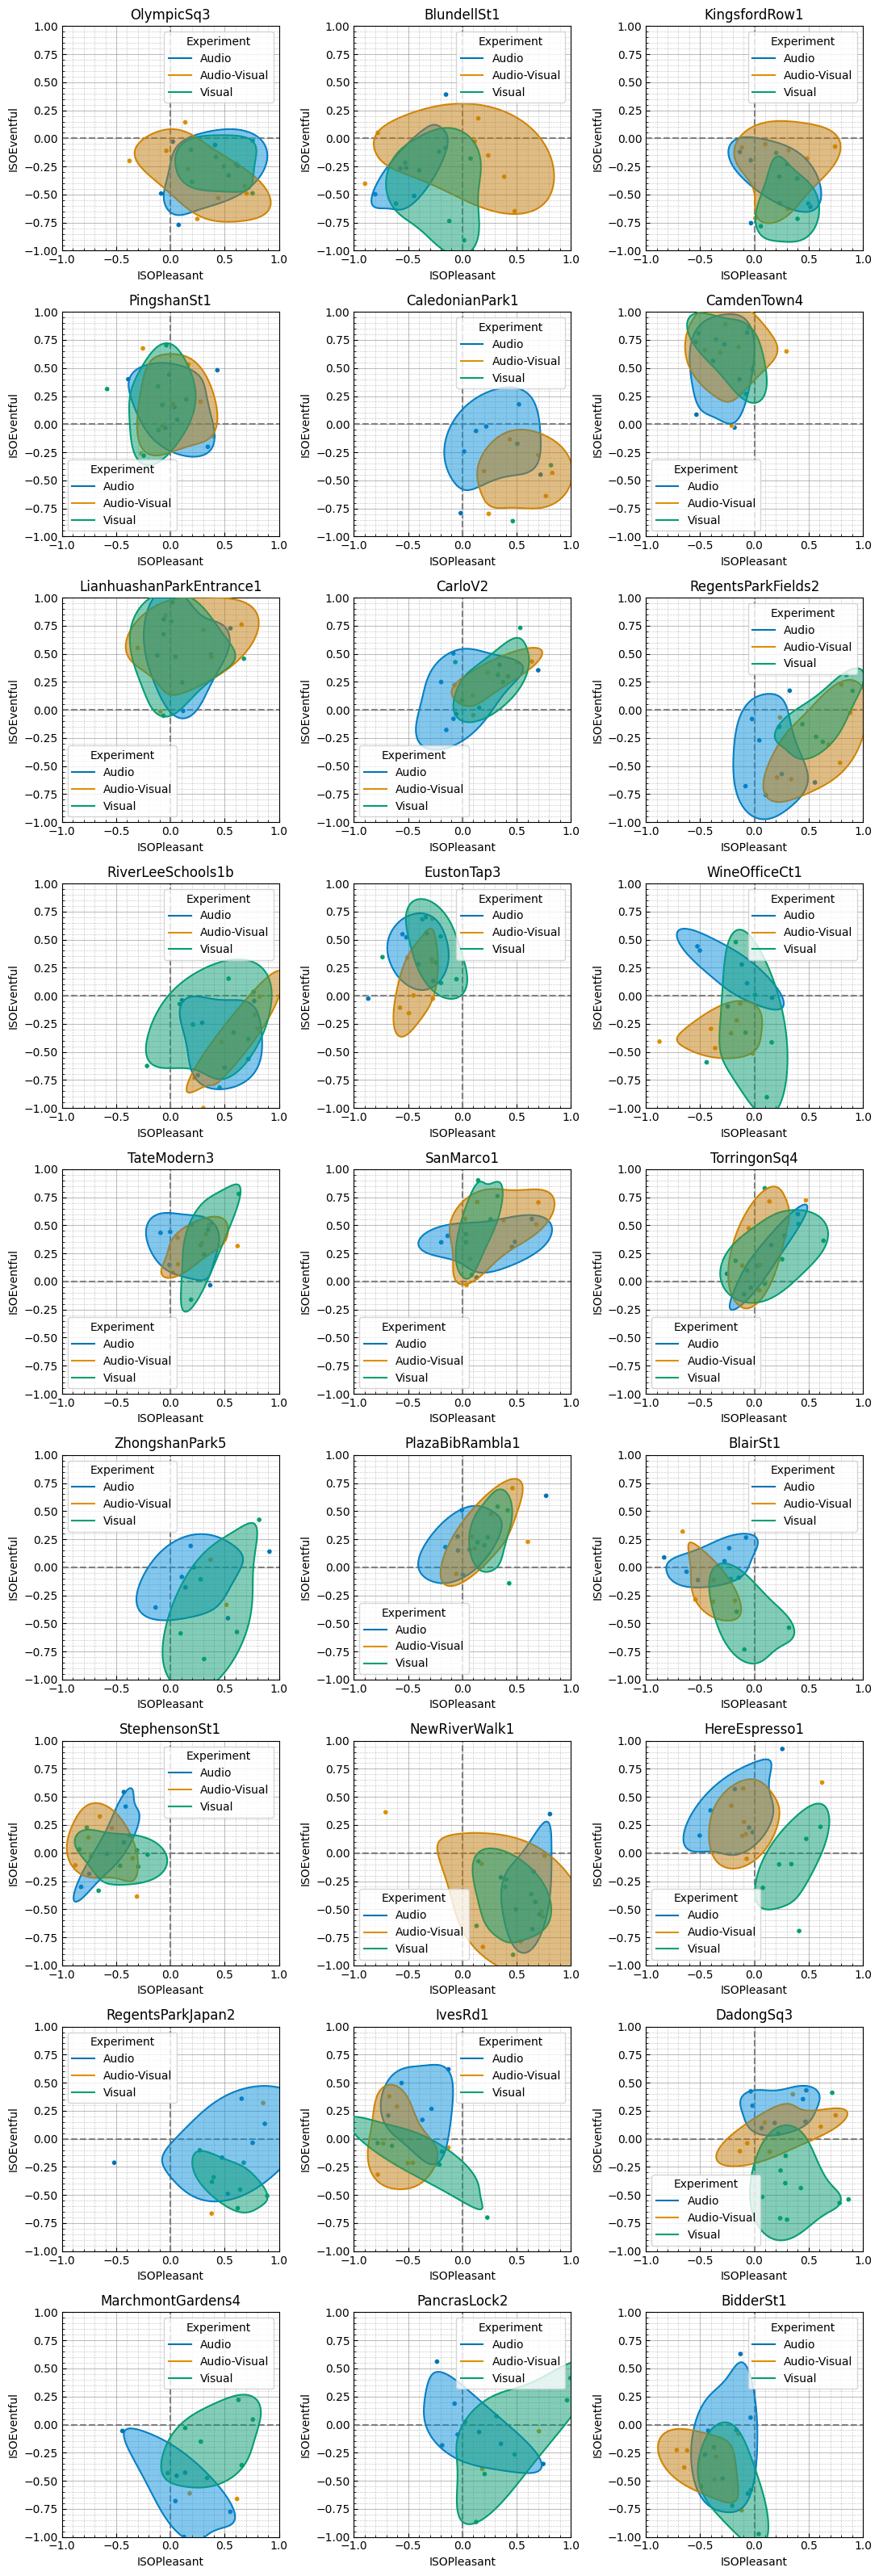

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(9, 3, figsize=(11, 32))
i = 0
for session in df.SessionID.unique():
    if session in ['MiradorSanNicolas1', 'BidderSt2'] or i > 26:
        pass
    elif i > 26:
        print(f"Session {session} not plotted")
        pass
    else:
        df.query("SessionID == @session").sspy.density(ax=axes.flatten()[i], hue='Experiment', title=session, density_type='simple')
        i += 1

plt.tight_layout()


In [53]:
a_mean = sspy.utils.surveys.mean_responses(df.query("Experiment == 'Audio'"), 'SessionID')
a_mean['Experiment'] = 'Audio'
av_mean = sspy.utils.surveys.mean_responses(df.query("Experiment == 'Audio-Visual'"), 'SessionID')
av_mean['Experiment'] = 'Audio-Visual'
v_mean = sspy.utils.surveys.mean_responses(df.query("Experiment == 'Visual'"), 'SessionID')
v_mean['Experiment'] = 'Visual'

mean_df = pd.concat([a_mean, av_mean, v_mean])
mean_df = mean_df.sspy.add_paq_coords(val_range = (-50, 50))
mean_df['SessionID'] = mean_df.index
mean_df

,PAQ1,PAQ2,PAQ3,PAQ4,PAQ5,PAQ6,PAQ7,PAQ8,Experiment,ISOPleasant,ISOEventful,SessionID
SessionID,,,,,,,,,,,,
BidderSt1,-16.000000,-9.666667,-13.833333,0.166667,8.666667,15.500000,11.166667,-19.166667,Audio,-0.232510,-0.120639,BidderSt1
BidderSt2,-41.666667,-36.000000,-32.333333,33.000000,37.666667,13.000000,47.000000,-24.333333,Audio,-0.640053,-0.304202,BidderSt2
BlairSt1,-21.714286,-11.000000,-5.142857,21.285714,26.142857,6.714286,3.714286,-25.142857,Audio,-0.386101,0.047415,BlairSt1
BlundellSt1,-25.571429,-12.857143,-27.000000,1.571429,33.857143,20.571429,26.571429,-32.142857,Audio,-0.442818,-0.221063,BlundellSt1
CaledonianPark1,14.857143,5.714286,-10.571429,-26.285714,-25.571429,2.714286,15.857143,15.571429,Audio,0.298844,-0.223281,CaledonianPark1
...,...,...,...,...,...,...,...,...,...,...,...,...
StephensonSt1,-34.428571,-21.428571,-13.714286,17.714286,27.428571,17.571429,2.000000,-29.142857,Visual,-0.507690,-0.042078,StephensonSt1
TateModern3,26.800000,33.200000,20.600000,9.400000,-25.200000,-18.800000,-22.800000,-2.000000,Visual,0.334306,0.365463,TateModern3
TorringonSq4,14.428571,22.142857,22.714286,4.571429,-15.714286,-16.857143,-10.000000,-15.857143,Visual,0.179250,0.309569,TorringonSq4


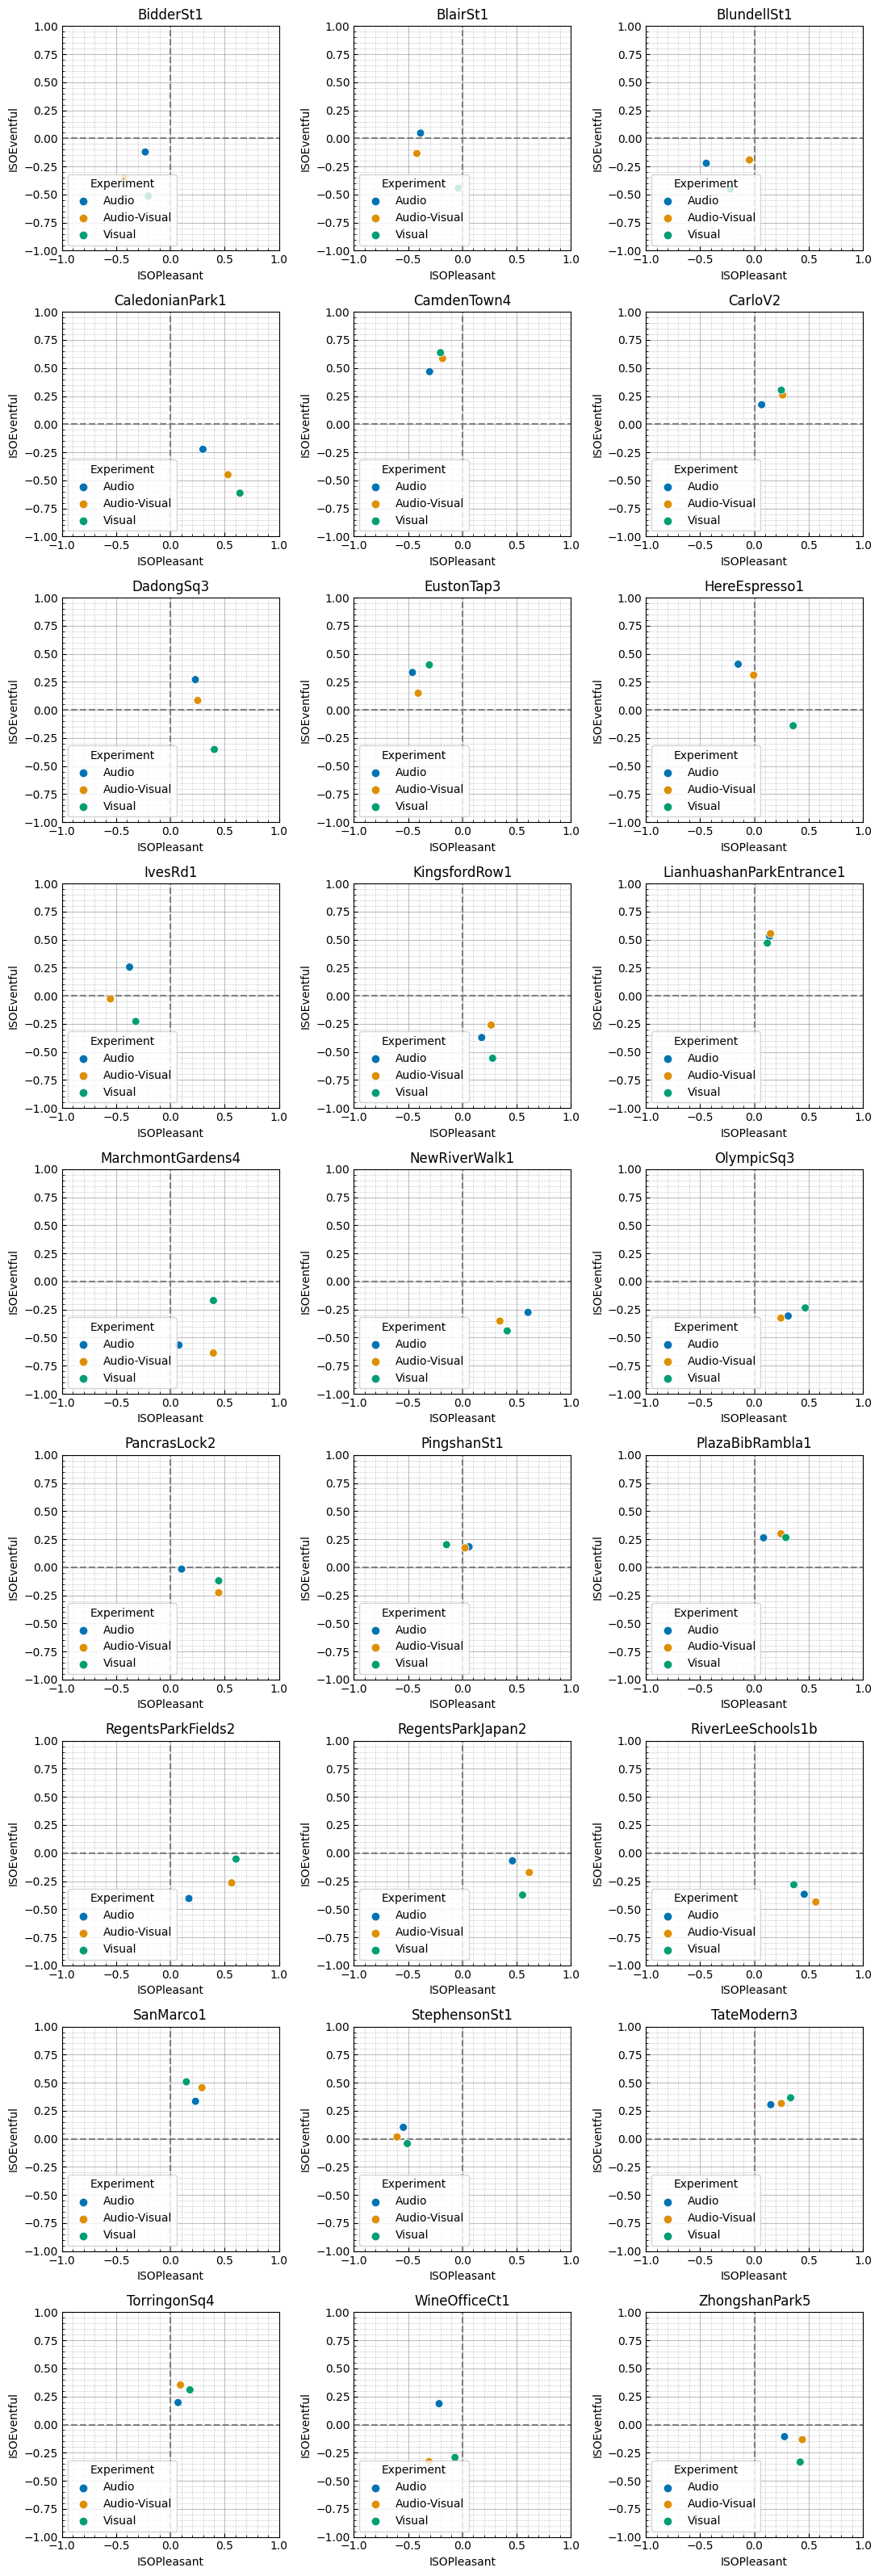

In [54]:
fig, axes = plt.subplots(9, 3, figsize=(11, 32))
i = 0
for session in mean_df.SessionID.unique():
    if session in ['MiradorSanNicolas1', 'BidderSt2'] or i > 26:
        pass
    elif i > 26:
        print(f"Session {session} not plotted")
        pass
    else:
        mean_df.query("SessionID == @session").sspy.scatter(ax=axes.flatten()[i], hue='Experiment', title=session, s=50)
        i += 1

plt.tight_layout()

In [61]:
mean_df.loc['MiradorSanNicolas1'].query("Experiment == 'Audio'")[['ISOPleasant', 'ISOEventful']]

,ISOPleasant,ISOEventful
SessionID,,
MiradorSanNicolas1,0.09795,0.423825


In [31]:
df['Experiment_cat'] = df['Experiment'].astype('category').cat.codes
df[['ISOPleasant', 'ISOEventful', 'Experiment_cat']].corr()

,ISOPleasant,ISOEventful,Experiment_cat
ISOPleasant,1.000000,-0.097707,0.141415
ISOEventful,-0.097707,1.000000,-0.108827
Experiment_cat,0.141415,-0.108827,1.000000
